# TARUN SUNKARANENI'S Point-Clustering Notebook: Lloyd's Algorithm

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import random
import math
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (6,4)
mpl.rcParams['figure.dpi'] = 200
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['C3.csv', 'C2.csv', 'C1.csv']


In [2]:
c2 = pd.read_csv("../input/C2.csv", names=['x0', 'x1'])

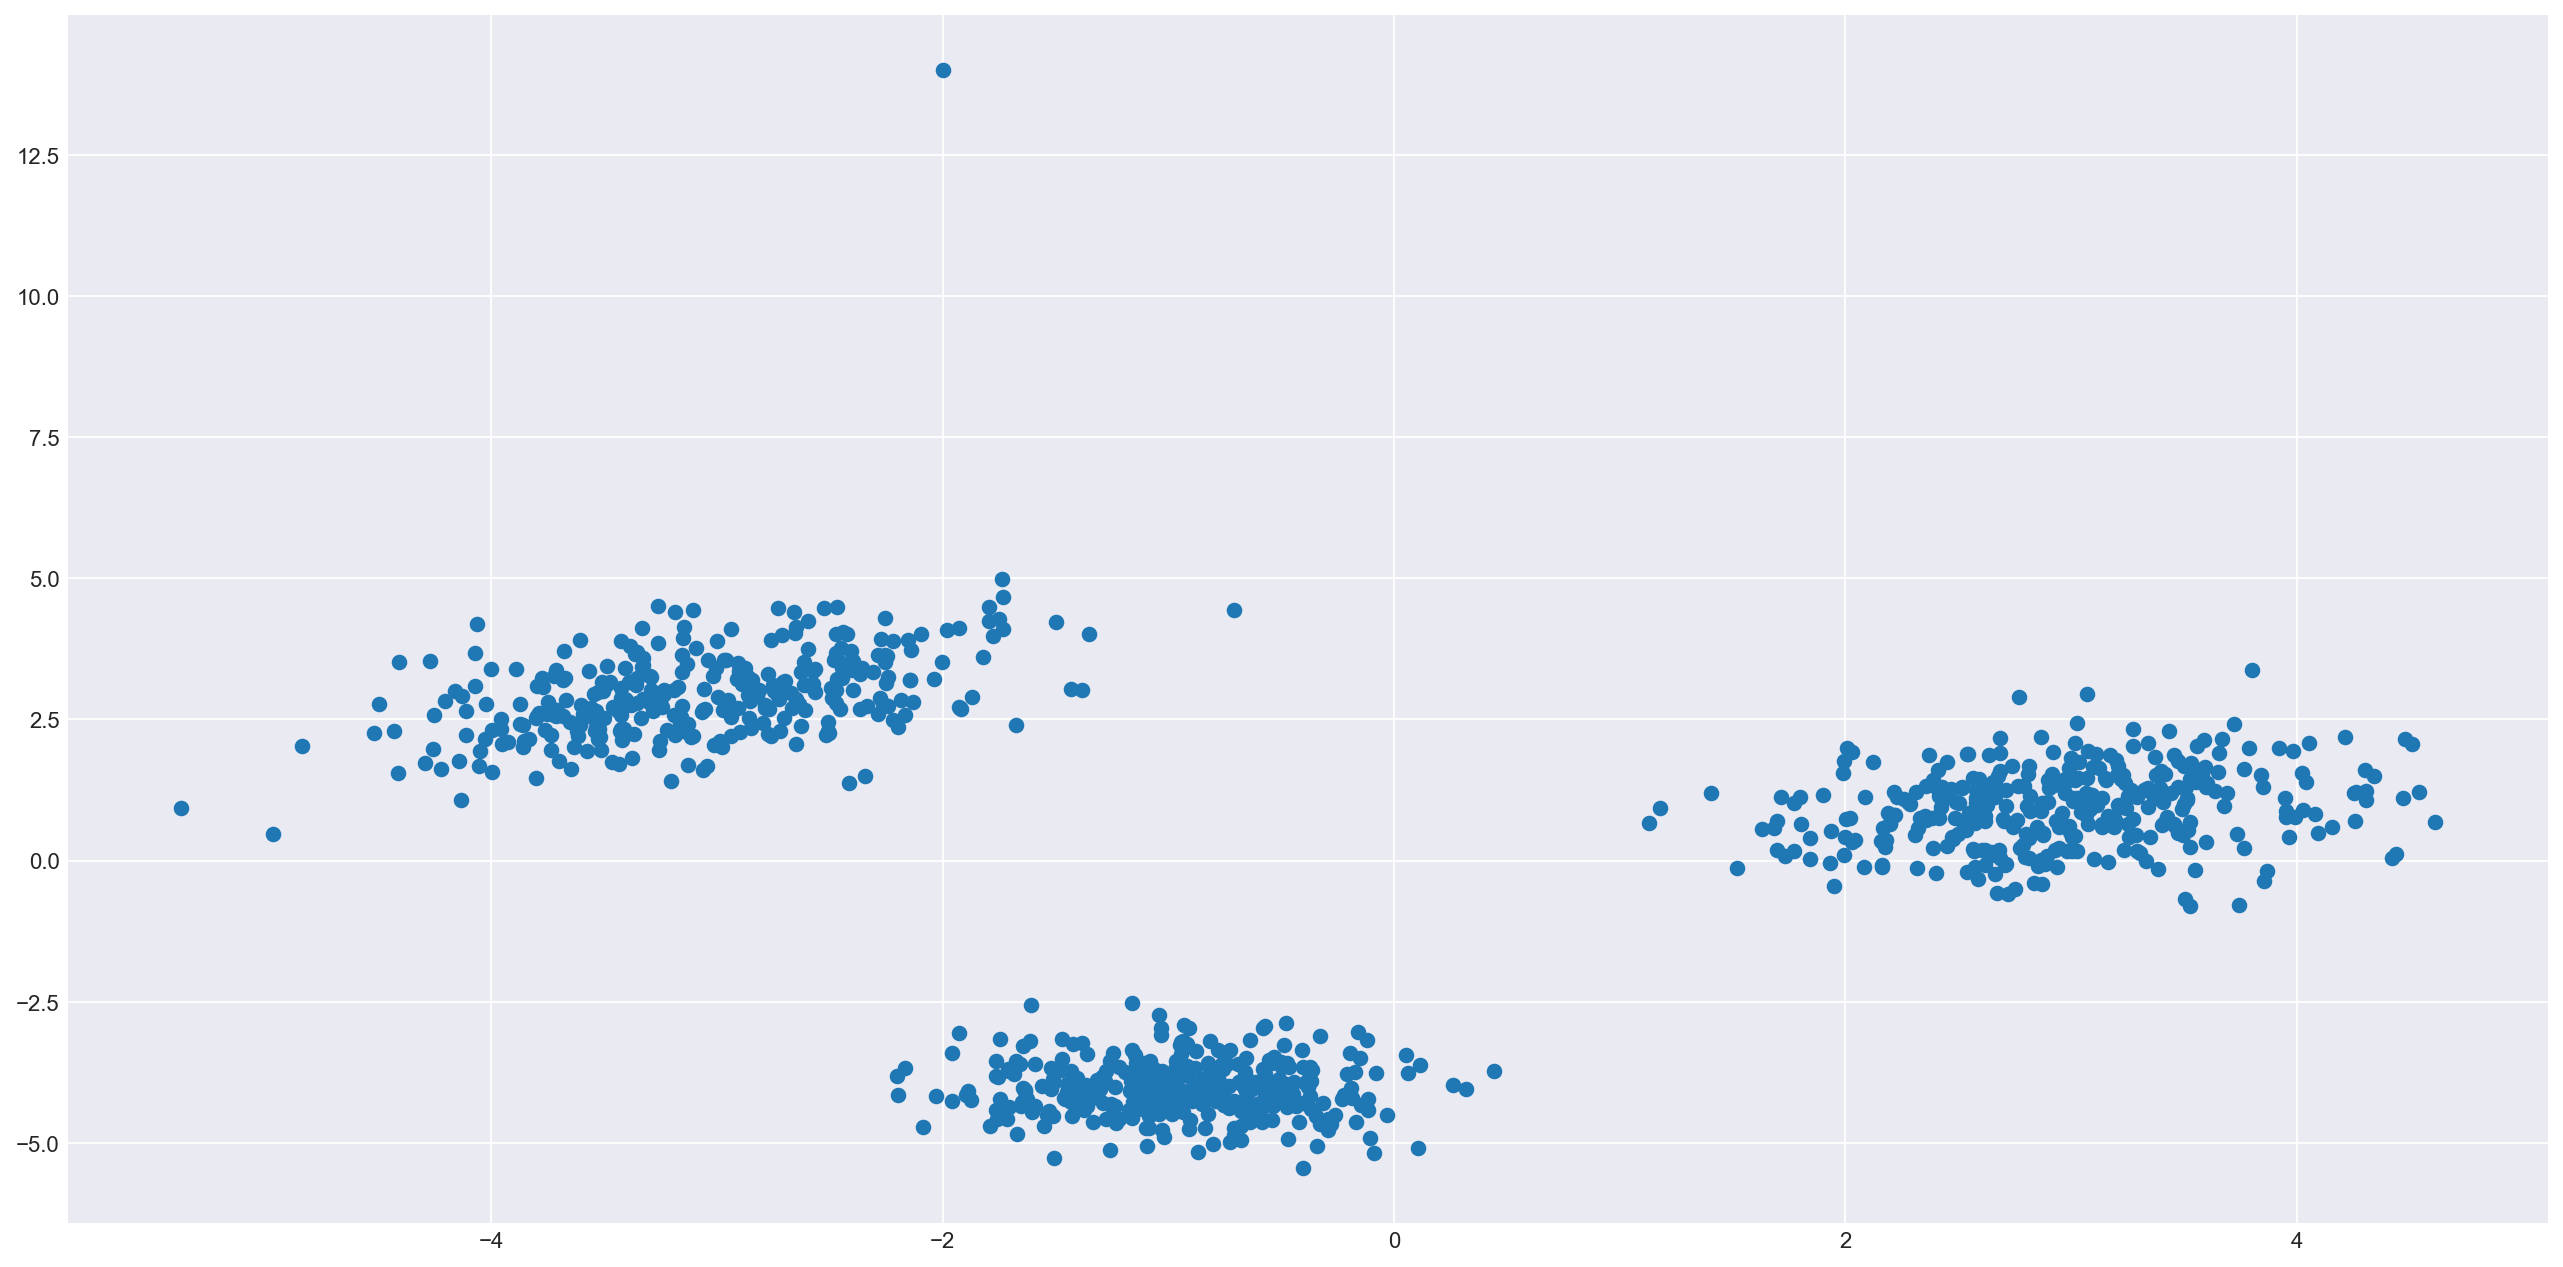

In [38]:
plt.figure(figsize=(20,10), dpi=160)
plt.scatter(c2['x0'],c2['x1'])

In [4]:
data_set = np.array([[row['x0'], row['x1']] for index, row in c2.iterrows()])

# Lloyd's algorithm

In [5]:
# This method calculates the center of gravity of a cluster of points.
# It isn't constrained by the amount of dimensions
def mean (cluster):
    average = [0 for i in range(len(cluster[0]))]
    for dimension in range(len(average)):
        for points in cluster:
            average[dimension] += points[dimension]
        average[dimension] /= len(cluster)
    return average

In [6]:
def get_rand_sites(data, clusters):
    sites = []
    initialCenters = set([])
    for i in range(clusters):
        initialCenter = random.randint(0,len(data))
        if initialCenter not in initialCenters:
            initialCenters.add(initialCenter)
            x = data[initialCenter]
            sites.append(x)
    return sites

In [8]:
def lloyd(data, cluster_num, iterations, sites = None):
    global SSE
    ###Our "buckets"
    clusters = [[] for i in range(cluster_num)]
    if sites is None: # If we weren't given a defined set of initial sites
        sites = get_rand_sites(data,cluster_num)
    for i in range(iterations): # 10 iterations will be sufficient enough for the given datasets
        #Evaluate every point in our given data set
        SSE = 0
        for point in range(len(data)):
            # Find the closest site. Then append it to an appropriate cluster
            closestSiteNumber = 0
            closestSiteDistance = distance.euclidean(sites[0], data[point]) 
            # The top two statements assume the first site is the closest we will verify and update by 
            # iterating through the remaining sites and comparing
            for siteNumber in range(1,len(sites),1):
                siteDistance = distance.euclidean(sites[siteNumber], data[point])
                if siteDistance < closestSiteDistance:
                    # This is where we reassign the "closest" site so far
                    closestSiteDistance = siteDistance
                    closestSiteNumber = siteNumber
            SSE += closestSiteDistance
            #After all the sites are checked we can 
            clusters[closestSiteNumber].append(data[point])
        #print('--------------')
        #for cluster in clusters:
        # print(len(cluster))
        #print('--------------')
        #
        #initialize new sites
        for m in range(cluster_num):
            sites[m] = mean(clusters[m])
            clusters[m].clear()
    SSE = math.sqrt(SSE/len(data))
    #print ('Centers :', sites)
    return sites

## With *C* = 1

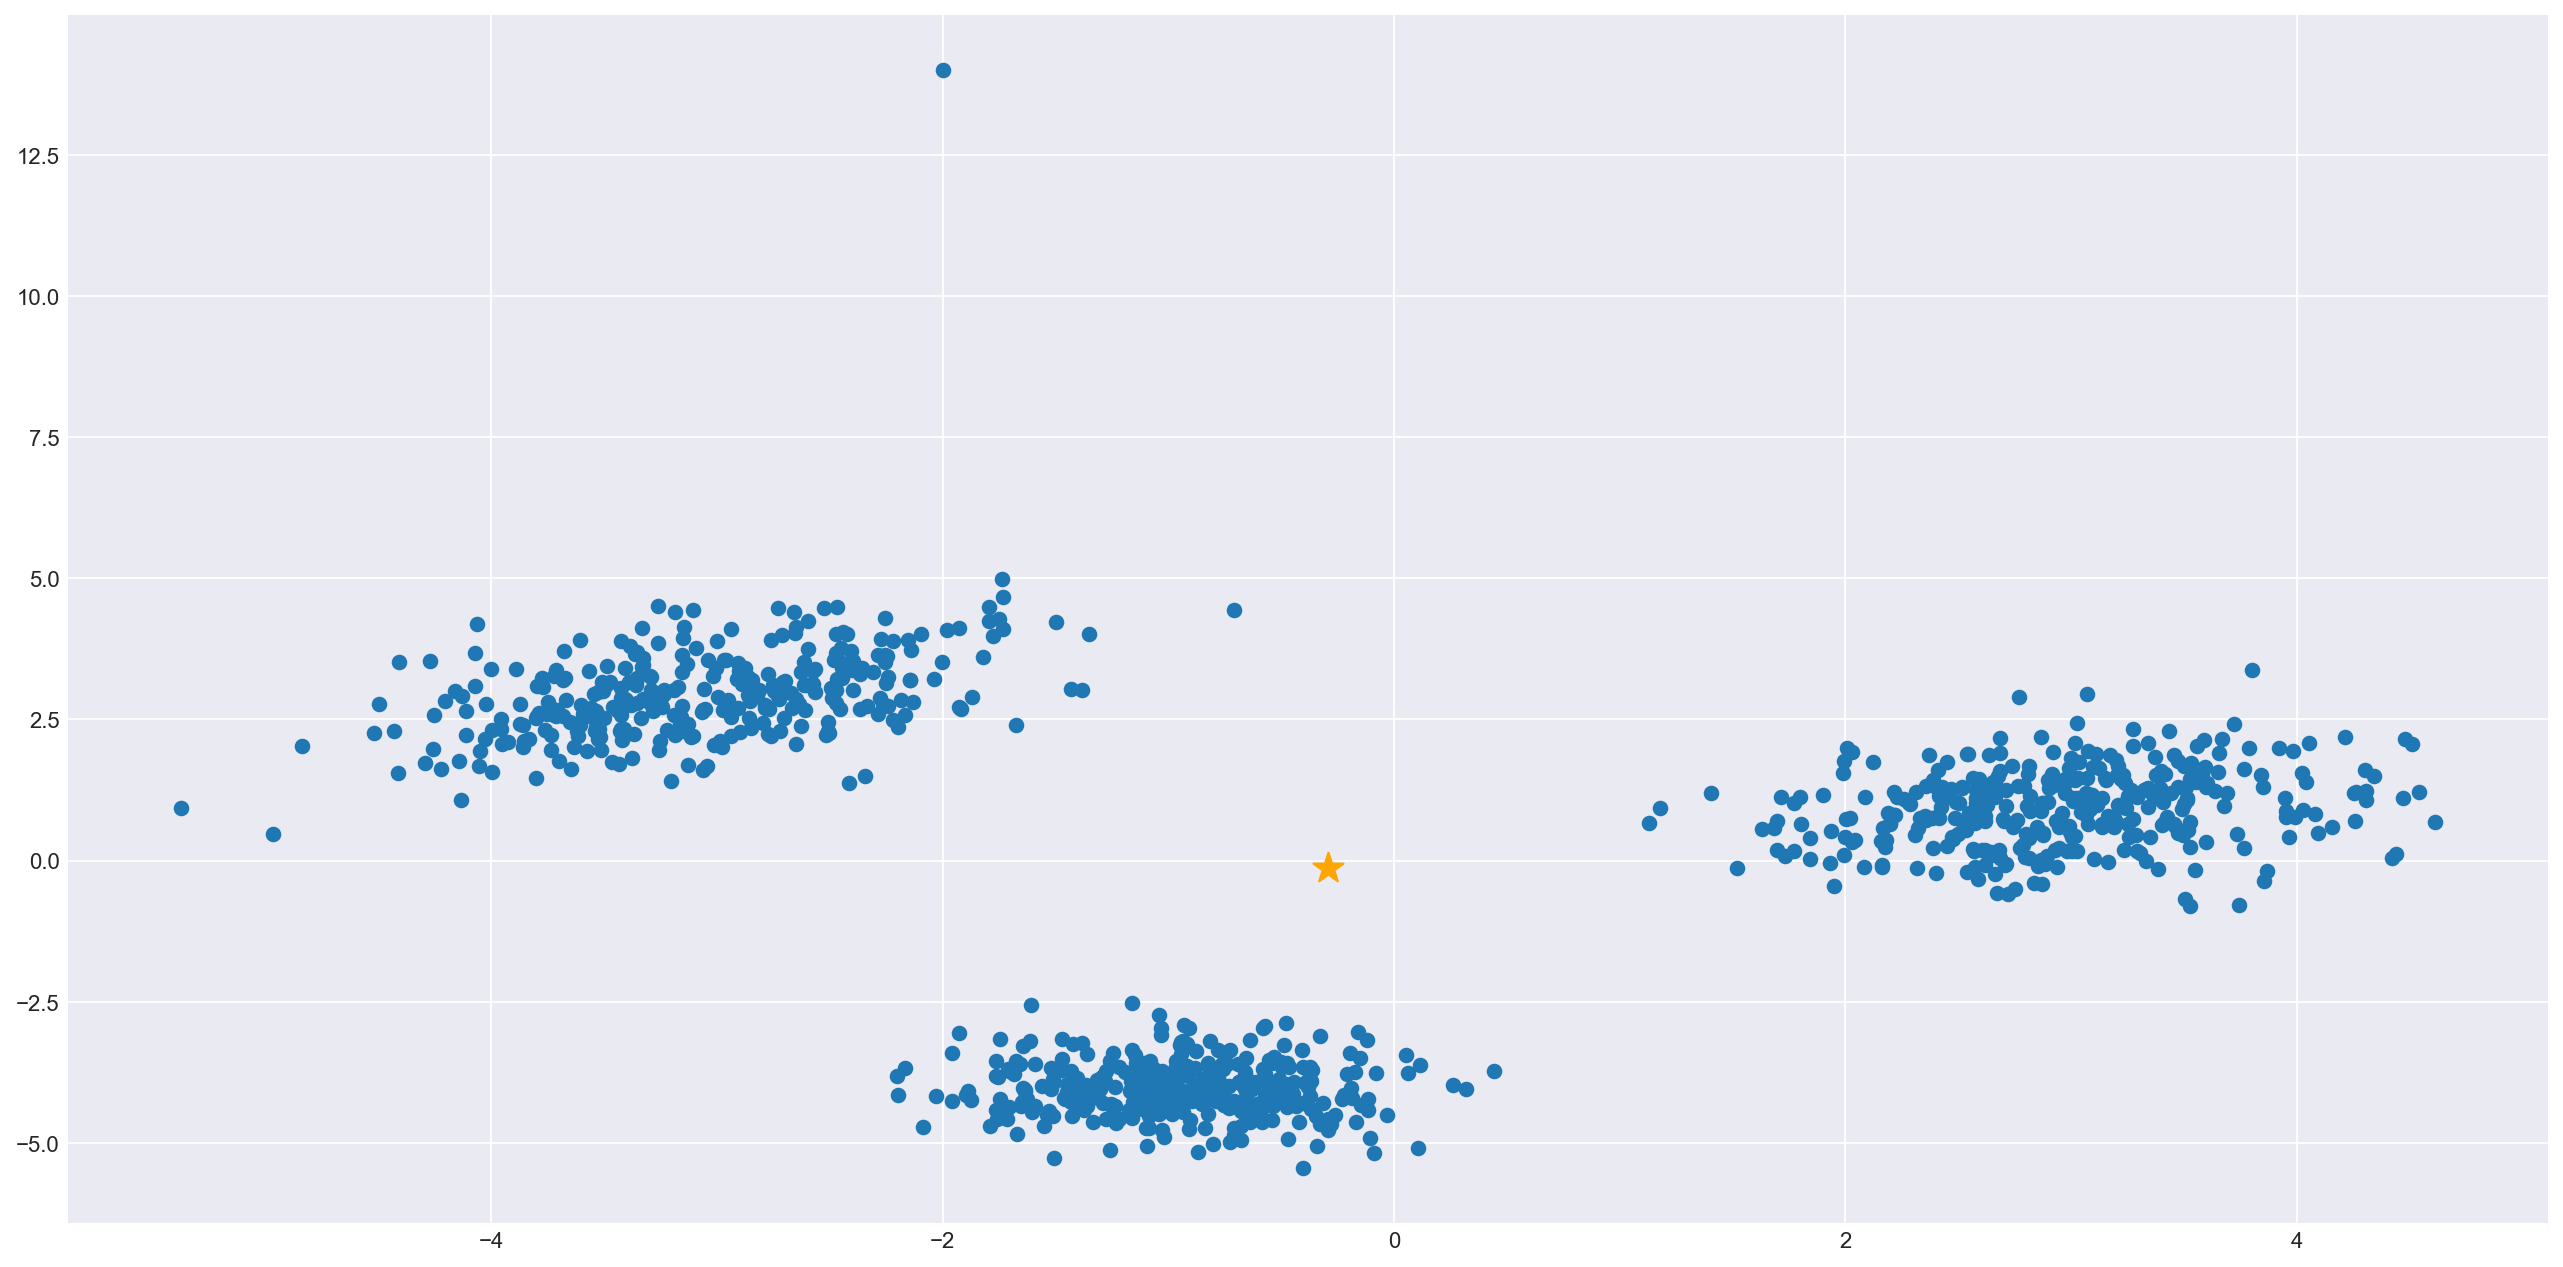

In [37]:
cluster_points = lloyd(data_set,1,10)
plt.figure(figsize=(20,10), dpi=160)
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is 0: # this is our first point, which was picked staticly
        plt.scatter(point[0],point[1], marker='*', c='orange', s=200)

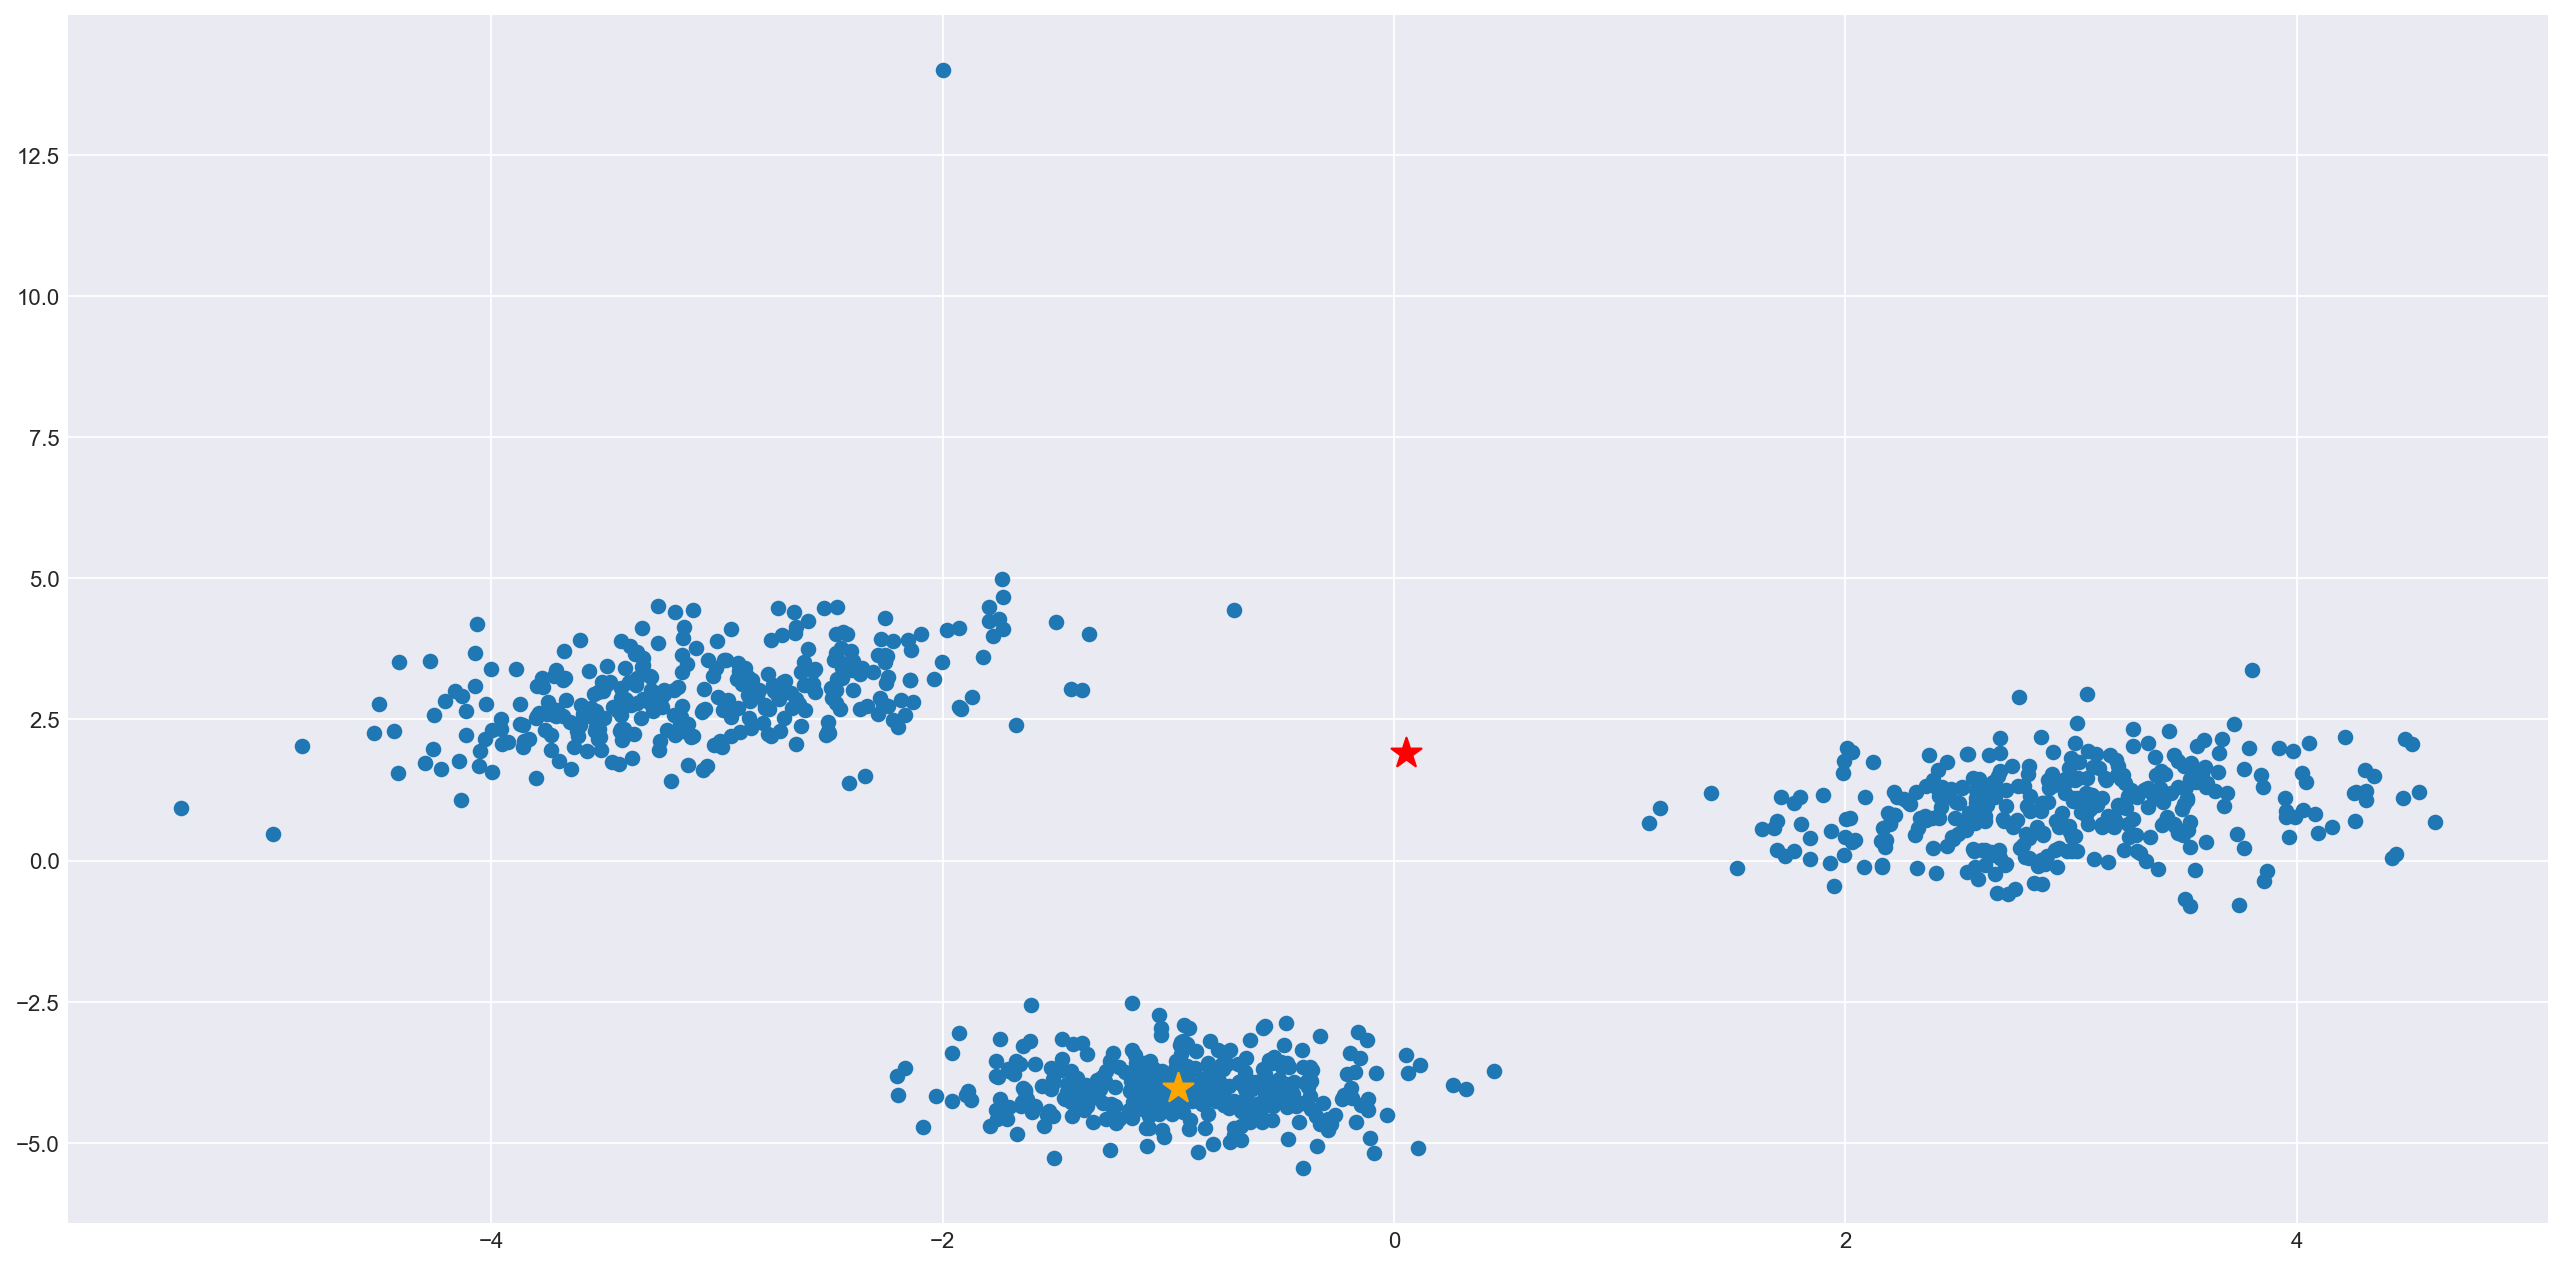

In [36]:
cluster_points = lloyd(data_set,2,10)
plt.figure(figsize=(20,10), dpi=160)
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        plt.scatter(point[0],point[1], marker='*', c='red', s=200)
    if index is 0: # this is our ifrst point, which was picked staticly
        plt.scatter(point[0],point[1], marker='*', c='orange', s=200)

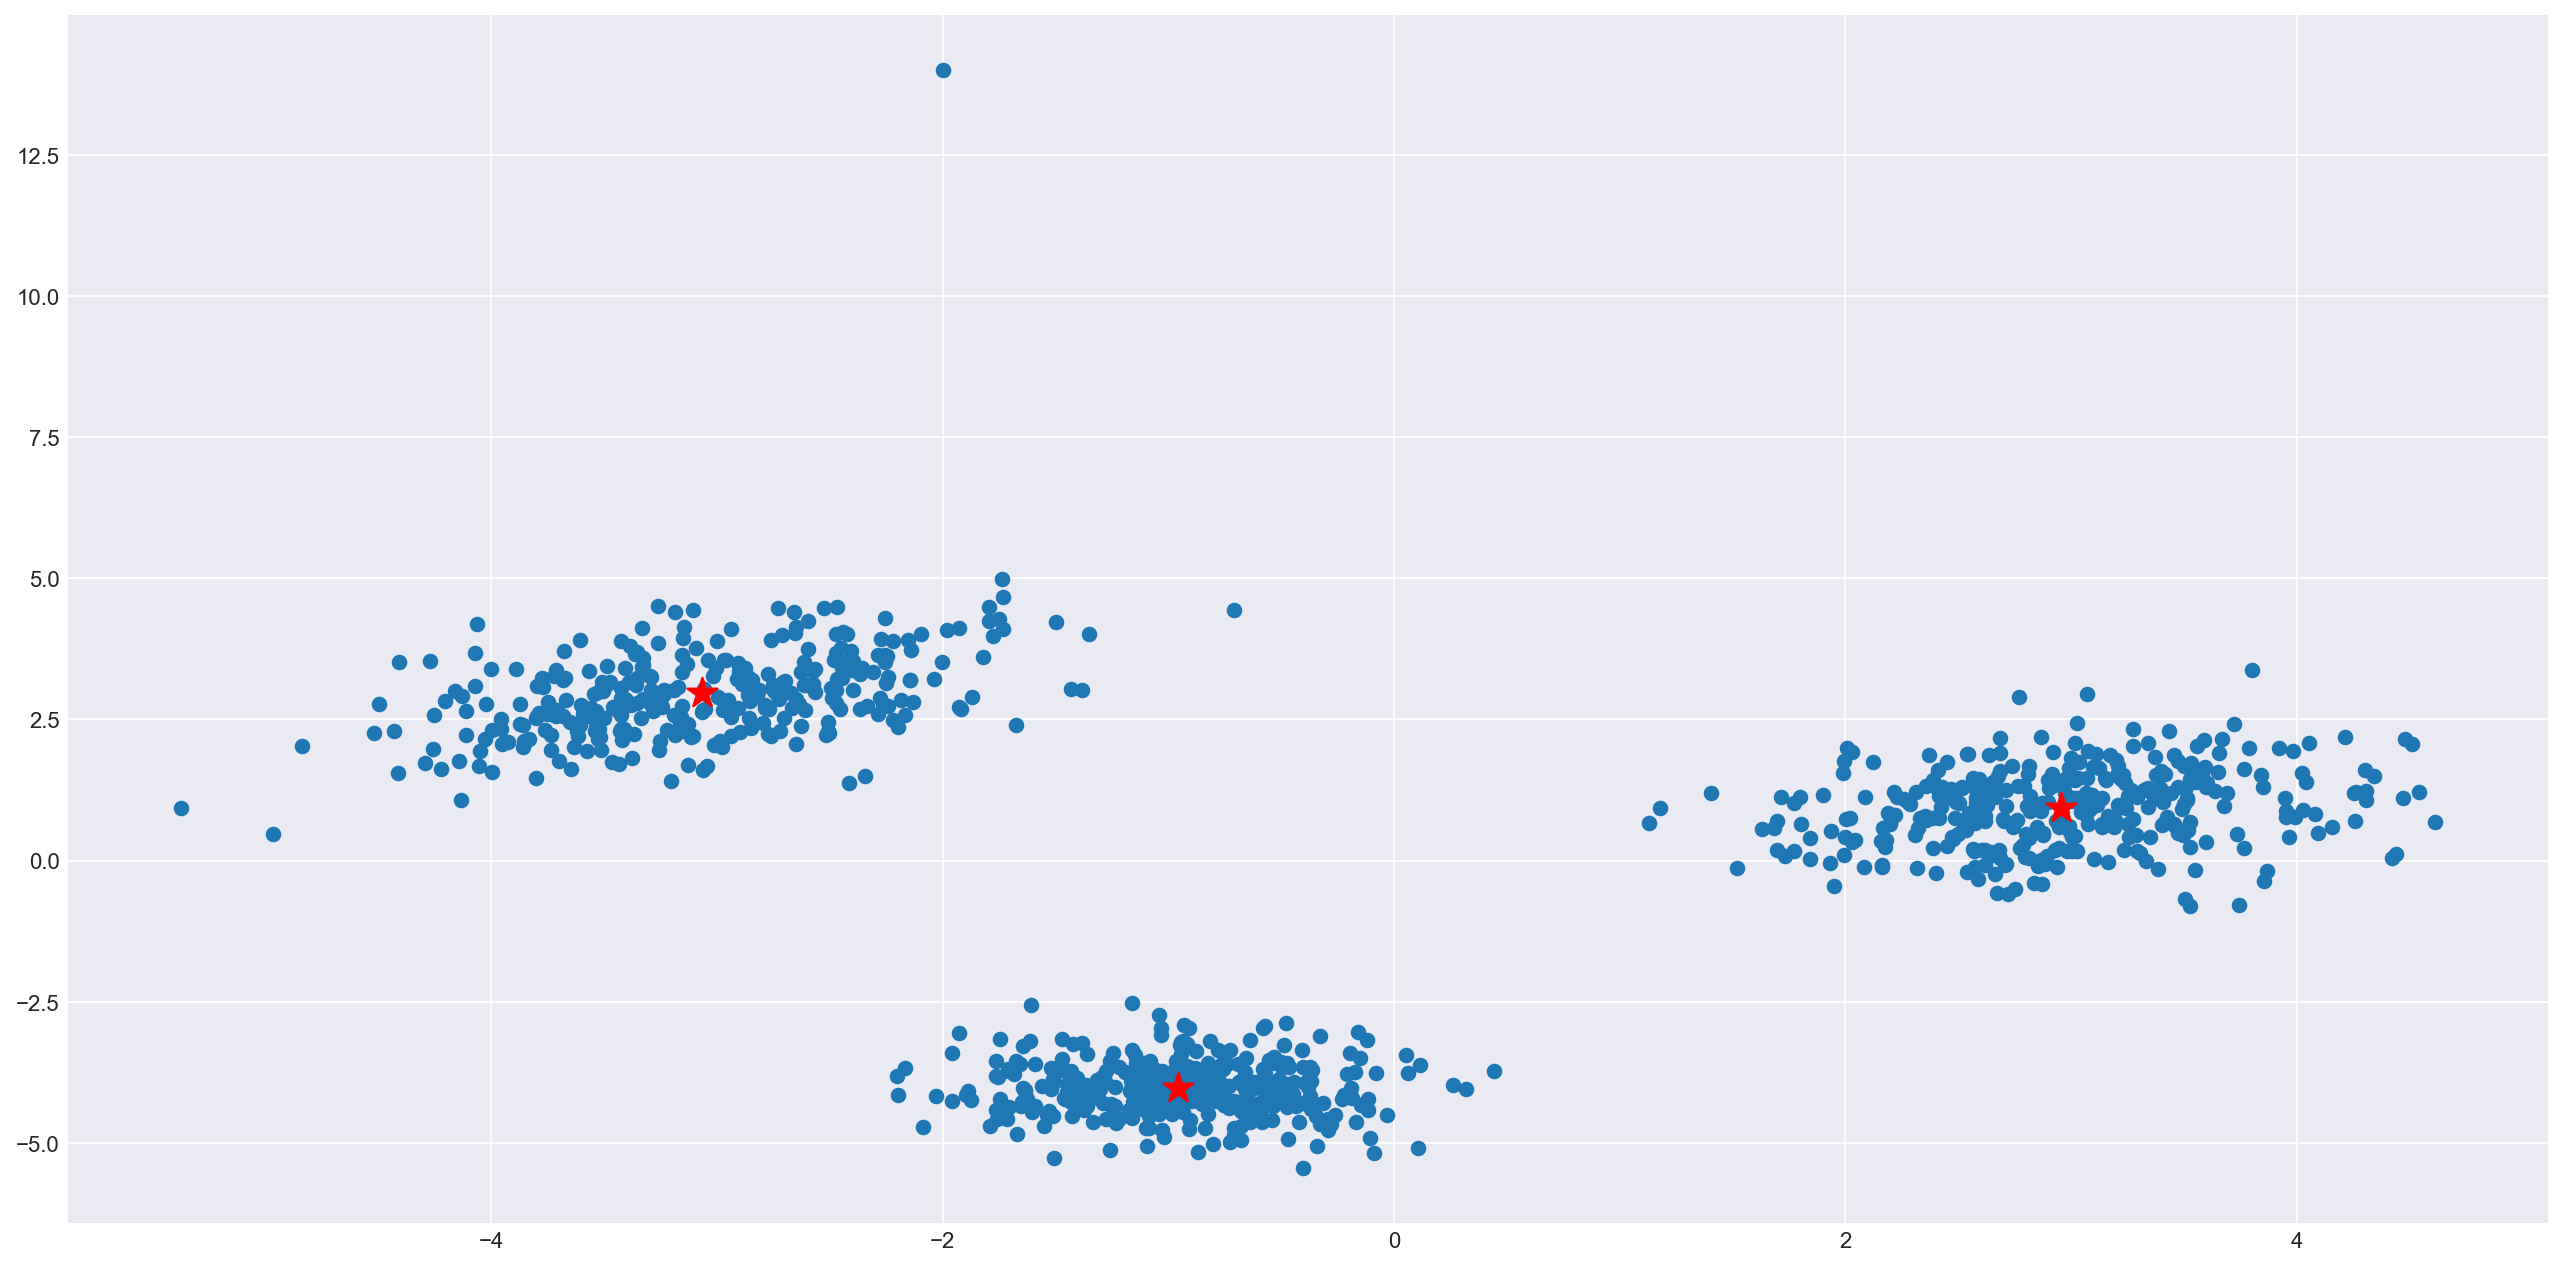

In [35]:
cluster_points = lloyd(data_set,3,10)
plt.figure(figsize=(20,10), dpi=160)
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    plt.scatter(point[0],point[1], marker='*', c='red', s=200)

Using outputs from Gonzalez algorithm with 3 clusters
$centeroids = [-2.7694973,  2.6778586],[ -2.,  14.],[-0.4032861, -5.4479696]$

As initial sites to run Lloyd's algorithm on

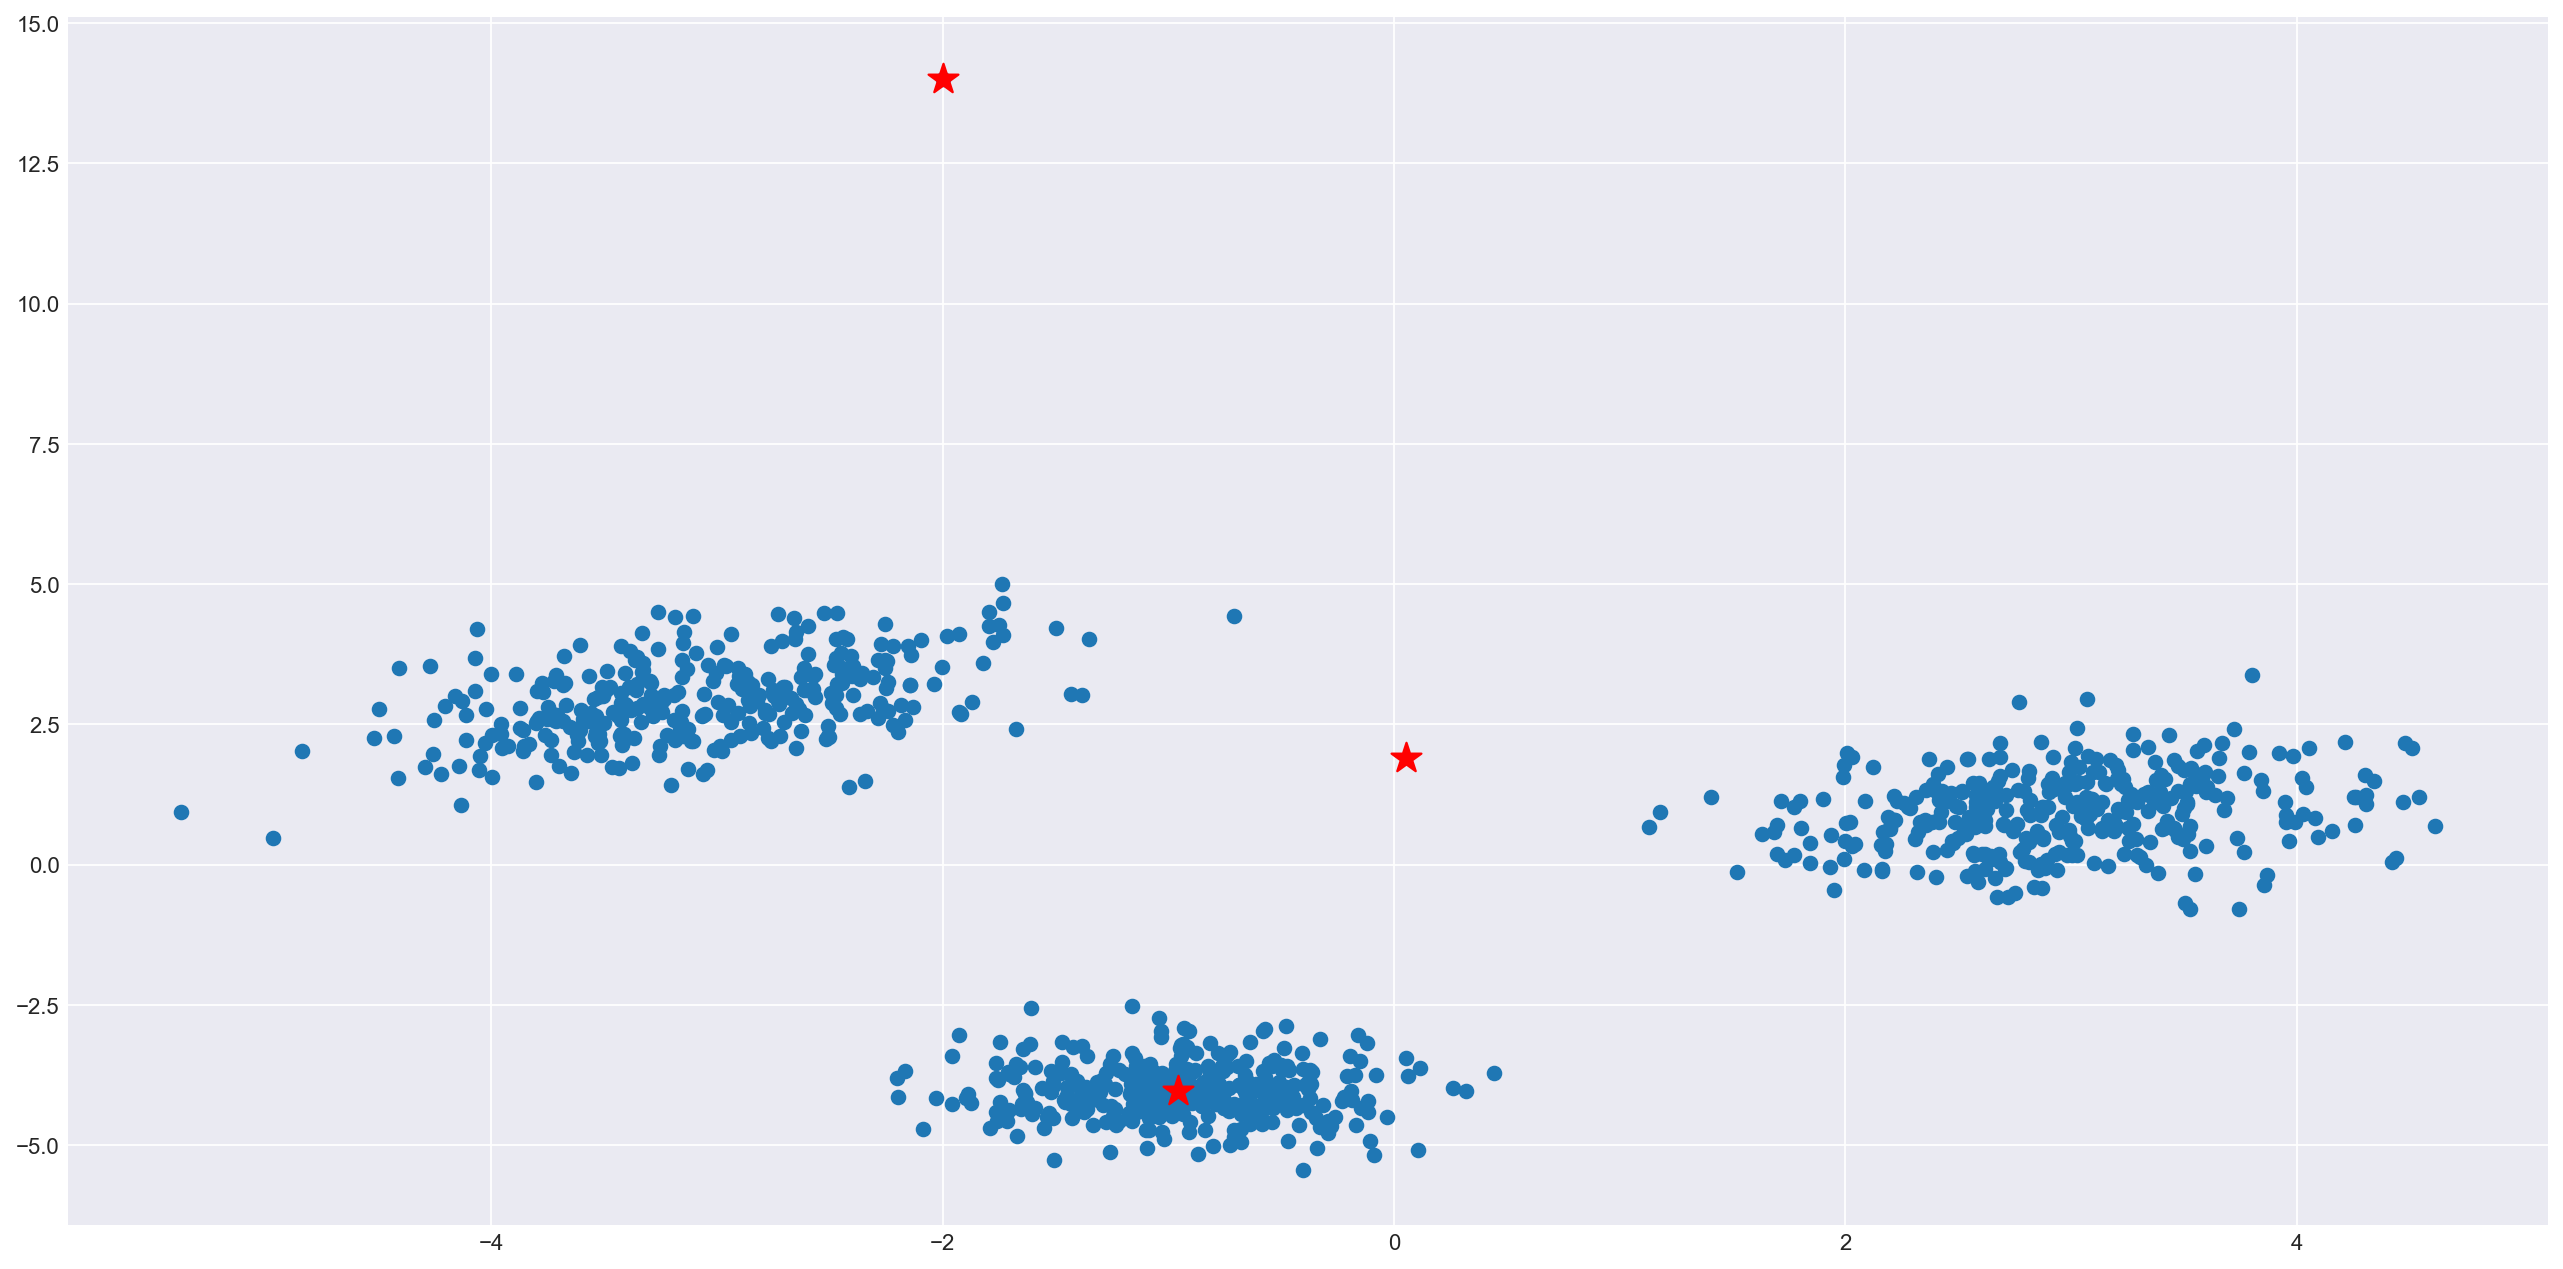

In [34]:
cluster_points = lloyd(data_set,3,10, sites=[[-2.7694973,  2.6778586],[ -2.,  14.],[-0.4032861, -5.4479696]] )
plt.figure(figsize=(20,10), dpi=160)
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    plt.scatter(point[0],point[1], marker='*', c='red', s=200)

This will choke Lloyd's algorithm. This is because the cluster centeroid at the top (as decided by the initial Gonzalez algorithm) will never be considered as the "closest point" to any other point, so Lloyd's algorithm will not converge at the global minimum and will essentially be trying to cluster three blobs with only two centeroids

## We will now test this on some results from a sample K-means++ run result

In [24]:
kmeanspp = [[[-2.7694973,  2.6778586],
       [-0.3134122, -4.2924068],
       [-0.8478038, -3.8900627]], [[-2.7694973,  2.6778586],
       [-0.6307322, -4.0521606],
       [-1.0072517, -4.0444141]], [[-2.7694973,  2.6778586],
       [ 3.0627658,  1.0613345],
       [-2.0880482, -4.7183092]], [[-2.7694973,  2.6778586],
       [-1.424031 , -3.2492692],
       [-1.1329593, -4.0822891]], [[-2.7694973,  2.6778586],
       [ 3.6782927,  0.9747179],
       [ 3.6573875,  1.9074461]], [[-2.7694973,  2.6778586],
       [ 3.1907366,  0.7516851],
       [ 2.947804 ,  0.2156488]], [[-2.7694973,  2.6778586],
       [ 2.9894181,  0.6152833],
       [-0.6109229, -4.5103122]], [[-2.7694973,  2.6778586],
       [-0.5589157, -4.1327596],
       [-1.7050291, -4.3726739]], [[-2.7694973,  2.6778586],
       [-0.7698388, -4.1403429],
       [ 2.8190348,  1.1527279]], [[-2.7694973,  2.6778586],
       [ 2.6612816,  1.3517672],
       [-0.4479971, -4.140967 ]], [[-2.7694973,  2.6778586],
       [ 3.7651962,  1.6296876],
       [-1.1025017, -4.1294918]], [[-2.7694973,  2.6778586],
       [ 4.3013515,  1.5979706],
       [ 3.0457888,  0.8591544]], [[-2.7694973,  2.6778586],
       [-0.7539188, -4.3332069],
       [ 2.5778289,  1.1089708]], [[-2.7694973,  2.6778586],
       [-1.6451548, -4.0212802],
       [-0.219348 , -4.1464612]], [[-2.7694973,  2.6778586],
       [-1.04129  , -4.2915748],
       [-2.0288544, -4.1643682]], [[-2.7694973,  2.6778586],
       [ 3.5574002,  2.0304307],
       [ 2.8190348,  1.1527279]], [[-2.7694973,  2.6778586],
       [-0.7403131, -3.6011258],
       [-1.2892526, -4.2932549]], [[-2.7694973,  2.6778586],
       [-0.7393536, -3.3960696],
       [-0.6109229, -4.5103122]], [[-2.7694973,  2.6778586],
       [ 0.1164904, -3.6249818],
       [-1.5485216, -4.6939484]], [[-2.7694973,  2.6778586],
       [-0.2930158, -4.7777361],
       [-0.2792882, -4.6608719]], [[-2.7694973,  2.6778586],
       [-0.8778206, -3.3678917],
       [-0.2063374, -3.7767508]], [[-2.7694973,  2.6778586],
       [ 3.3946256,  1.2723963],
       [ 2.58055  ,  1.0249431]], [[-2.7694973,  2.6778586],
       [-1.6465063, -4.2683149],
       [ 2.5048597,  1.0294241]], [[-2.7694973,  2.6778586],
       [-0.6589579, -3.7482979],
       [ 2.6278163,  0.9867214]], [[-2.7694973,  2.6778586],
       [-0.0317067, -4.5030197],
       [-1.424031 , -3.2492692]], [[-2.7694973,  2.6778586],
       [-1.144376 , -3.5825494],
       [-0.4219392, -4.6359055]], [[-2.7694973,  2.6778586],
       [ 2.3566026,  0.7108981],
       [-1.8201382,  3.6008855]], [[-2.7694973,  2.6778586],
       [-0.6762747, -4.9474339],
       [ 1.9488584, -0.452856 ]], [[-2.7694973,  2.6778586],
       [ 4.0229751,  1.5492003],
       [ 2.3136332,  1.2114674]], [[-2.7694973,  2.6778586],
       [-1.6110849, -4.334677 ],
       [-1.2863821, -3.9365368]], [[-2.7694973,  2.6778586],
       [-0.9345957, -4.4447562],
       [-0.6775004, -4.7069657]], [[-2.7694973,  2.6778586],
       [ 3.5957015,  1.2995929],
       [-1.06451  , -4.2277965]], [[-2.7694973,  2.6778586],
       [ 2.4082169,  1.28434  ],
       [-0.5706412, -4.1174663]], [[-2.7694973,  2.6778586],
       [ 3.3065831,  0.136045 ],
       [-1.0323698, -3.0806936]], [[-2.7694973,  2.6778586],
       [-0.9095297, -4.7618195],
       [-0.7884658, -4.2599739]], [[-2.7694973,  2.6778586],
       [-0.8378581, -4.7288627],
       [-1.2467027, -4.4763997]], [[-2.7694973,  2.6778586],
       [ 0.4420506, -3.7186913],
       [-0.8686061, -5.1632766]], [[-2.7694973,  2.6778586],
       [ 3.6573875,  1.9074461],
       [ 4.0229751,  1.5492003]], [[-2.7694973,  2.6778586],
       [ 3.4410419,  1.1942346],
       [-0.9732408, -3.9987801]], [[-2.7694973,  2.6778586],
       [ 3.5962545,  0.3363393],
       [ 2.8172597,  0.8805717]], [[-2.7694973,  2.6778586],
       [-1.6212305, -4.2900142],
       [-0.9426558, -3.4184818]], [[-2.7694973,  2.6778586],
       [-1.0103202, -3.9052377],
       [-1.0945453, -3.8629277]], [[-2.7694973,  2.6778586],
       [ 2.4218642,  0.9440339],
       [ 0.0529446, -3.4471063]], [[-2.7694973,  2.6778586],
       [-0.7497741, -4.2457199],
       [-0.7526649, -4.3371691]], [[-2.7694973,  2.6778586],
       [-0.5079141, -3.869267 ],
       [-0.7104739, -4.8595071]], [[-2.7694973,  2.6778586],
       [ 3.0990604,  1.1020693],
       [-4.4102716,  1.548617 ]], [[-2.7694973,  2.6778586],
       [-1.4093424, -4.2288914],
       [ 2.2190598,  0.8017626]], [[-2.7694973,  2.6778586],
       [-0.3676059, -3.9099399],
       [ 3.2272955,  0.9568365]], [[-2.7694973,  2.6778586],
       [ 2.661807 ,  1.1327662],
       [-0.4909914, -4.1735372]], [[-2.7694973,  2.6778586],
       [ 3.0248303,  0.1727063],
       [-0.7884658, -4.2599739]]]

In [25]:
cost = []
for point in enumerate(kmeanspp):
    lloyd(data_set,3,10, point[1])
    cost.append(SSE)

In [27]:
trials = len(kmeanspp)
totalFrac = 1/trials
cost = sorted(cost)
y = [cost.index(cost[z])*totalFrac for z in range(len(cost))]

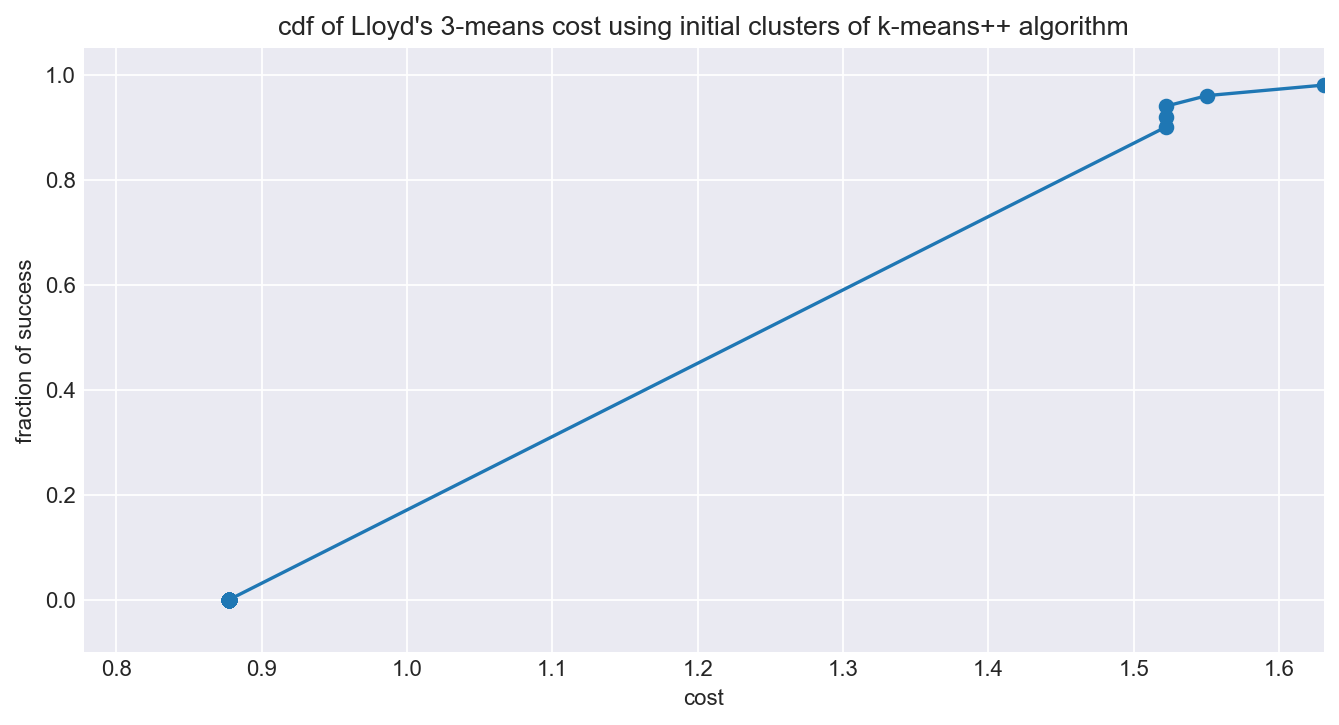

In [33]:
plt.figure(figsize=(10,5), dpi= 160)
plt.title("cdf of Lloyd's 3-means cost using initial clusters of k-means++ algorithm")
plt.xlabel("cost")
plt.ylabel("fraction of success")
plt.xlim([np.min(cost)-.1,np.max(cost)])
plt.ylim([-0.1,1.05])
plt.scatter(np.array(cost), np.array(y))
plt.plot(np.array(cost), np.array(y))
plt.show()

Breakdown of the Plot: When we use some of the sample $K-means++$ cluster points and run Lloyd's algorithm on it, about `90%` of the trials will result in an average SSE of `0.88`. The other `10%` will be examples of some "choke" cases, and therefore their cost is way higher than the optimal case. It may not be apparent, but `~80%` of the points are actually plotted where the lower left corner is.